# Import libraries

In [31]:
import pandas as pd

In [ ]:
# spam_ham_df = pd.read_csv('spam_Emails_data.csv')

# # spam_ham_df = pd.read_csv('mail_data.csv')
# spam_ham_df

,label,text
0,Spam,viiiiiiagraaaa\nonly for the ones that want to...
1,Ham,got ice thought look az original message ice o...
2,Spam,yo ur wom an ne eds an escapenumber in ch ma n...
3,Spam,start increasing your odds of success & live s...
4,Ham,author jra date escapenumber escapenumber esca...
...,...,...
193847,Ham,on escapenumber escapenumber escapenumber rob ...
193848,Spam,we have everything you need escapelong cialesc...
193849,Ham,hi quick question say i have a date variable i...
193850,Spam,thank you for your loan request which we recie...


# Data cleaning

In [ ]:
# spam_ham_df['label'].value_counts()

label
Ham     102160
Spam     91692
Name: count, dtype: int64

In [ ]:
# spam_ham_df.head(5)

,label,text
0,Spam,viiiiiiagraaaa\nonly for the ones that want to...
1,Ham,got ice thought look az original message ice o...
2,Spam,yo ur wom an ne eds an escapenumber in ch ma n...
3,Spam,start increasing your odds of success & live s...
4,Ham,author jra date escapenumber escapenumber esca...


In [ ]:
# spam_ham_df.shape

(193852, 2)

In [ ]:
# spam_ham_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193852 entries, 0 to 193851
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   label   193852 non-null  object
 1   text    193850 non-null  object
dtypes: object(2)
memory usage: 3.0+ MB


# Reduce the size of rows
Balance the spam ham

In [ ]:
# spam_df = spam_ham_df[spam_ham_df['label']=='Spam']
# ham_df = spam_ham_df[spam_ham_df['label']=='Ham']

# n= 4000

# spam_sp=spam_df.sample(n=n,random_state=42)
# ham_sp=ham_df.sample(n=n,random_state=42)

# reduced_df = pd.concat([spam_sp,ham_sp]).sample(frac=1).reset_index(drop=True)

In [ ]:
# reduced_df.to_csv('email_data.csv',index=False)

In [39]:
df = pd.read_csv('email_data.csv')
# df = pd.read_csv('mail_data.csv')

In [40]:
df.head()

,label,text
0,Spam,bescapenumber descapenumber bescapenumber besc...
1,Ham,wrong aggie the key word is man dammit little ...
2,Ham,hello mark great article months corporate lega...
3,Spam,yap international inc ypil voip technology req...
4,Ham,hi theresa know anything two entries hit co es...


In [41]:
# renaming the cols
df.rename(columns={'label':'category','text':'email'},inplace=True)

df.head()

,category,email
0,Spam,bescapenumber descapenumber bescapenumber besc...
1,Ham,wrong aggie the key word is man dammit little ...
2,Ham,hello mark great article months corporate lega...
3,Spam,yap international inc ypil voip technology req...
4,Ham,hi theresa know anything two entries hit co es...


In [42]:
df.describe()

,category,email
count,8000,8000
unique,2,8000
top,Spam,bescapenumber descapenumber bescapenumber besc...
freq,4000,1


In [43]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [44]:
df['category'] = encoder.fit_transform(df['category'])
df.head()

,category,email
0,1,bescapenumber descapenumber bescapenumber besc...
1,0,wrong aggie the key word is man dammit little ...
2,0,hello mark great article months corporate lega...
3,1,yap international inc ypil voip technology req...
4,0,hi theresa know anything two entries hit co es...


In [45]:
# check for missing values
df.isnull().sum()

category    0
email       0
dtype: int64

In [46]:
# check for duplicate values
df.duplicated().sum()

np.int64(0)

In [47]:
df.shape

(8000, 2)

# EDA

In [48]:
df.head()

,category,email
0,1,bescapenumber descapenumber bescapenumber besc...
1,0,wrong aggie the key word is man dammit little ...
2,0,hello mark great article months corporate lega...
3,1,yap international inc ypil voip technology req...
4,0,hi theresa know anything two entries hit co es...


In [49]:
df['category'].value_counts()

category
1    4000
0    4000
Name: count, dtype: int64

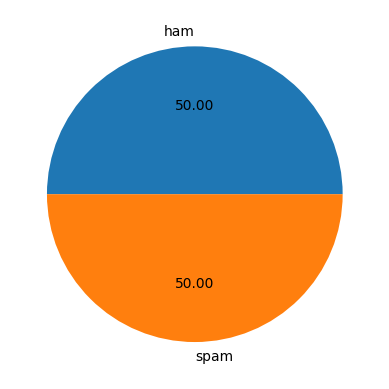

In [50]:
import matplotlib.pyplot as plt

plt.pie(df['category'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

* Data is balanced

In [51]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [52]:
df['char_count'] = df['email'].apply(len)
df.head()

,category,email,char_count
0,1,bescapenumber descapenumber bescapenumber besc...,1597
1,0,wrong aggie the key word is man dammit little ...,1203
2,0,hello mark great article months corporate lega...,1033
3,1,yap international inc ypil voip technology req...,4936
4,0,hi theresa know anything two entries hit co es...,388


In [53]:
# no of words
df['word_count'] = df['email'].apply(lambda x: word_tokenize(x)).apply(len)
df.head()

,category,email,char_count,word_count
0,1,bescapenumber descapenumber bescapenumber besc...,1597,144
1,0,wrong aggie the key word is man dammit little ...,1203,208
2,0,hello mark great article months corporate lega...,1033,128
3,1,yap international inc ypil voip technology req...,4936,845
4,0,hi theresa know anything two entries hit co es...,388,48
